In [13]:
# CS 237 Spring 2019
# Author: Alina Ene (aene@bu.edu)
# Used in L26

In [14]:
# imports
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# CS 237: Reservoir sampling

This notebook provides a brief introduction to data streams and randomized algorithms. Specifically, we will study the problem of sampling an item uniformly at random from a data stream. The algorithm we will describe is called reservoir sampling and it is an important tool in Computer Science and beyond (see [this wikipedia page](https://en.wikipedia.org/wiki/Reservoir_sampling)).

## Data streams

A data stream is an extremely long sequence of items that you can only read only once, in order. A good example of a data stream is the sequence of packets that pass through a router. Here we will assume that we can get the stream items one by one by calling:

```
x = next_stream_element() # returns next element in the stream
```

Here is a small example of a stream that we will use as a test case.

In [28]:
# example stream: 1, 2, 3, ..., 100
N = 0
maxN = 100

def stream_initialize():
    global N
    N = 0

def next_stream_element():
    global N, maxN
    if N == maxN:
        return '#'
    N = N + 1
    return N

# try a longer stream (change maxN)

## Data stream algorithms

Data stream algorithms must process each item in the stream quickly, using very little memory; there is simply too much data to store, and it arrives too quickly for any complex computations. Every data stream algorithm looks roughly like this:

```
def do_something_interesting():
  while True:
    x = next_stream_element() # returns next element in the stream
    if x == '#'  # end of stream marker
      break
    do something interesting with x
  return something
```

## Reservoir sampling algorithm

The algorithmic task that we want to solve is the following:
 > Choose one item uniformly at random from a data stream, **without knowing the length of the stream in advance**

We now describe an algorithm for this task. Note that the algorithm processes each item very quickly: it spends O(1) time per stream element. It also uses very little memory: it stores only one stream item and a counter that counts the number of stream items that have arrived so far.

In [16]:
# reservoir sampling algorithm
def stream_sample():
    n = 0 # number of stream items seen so far
    s = 0 # sampled item
    while True:
        x = next_stream_element() # get next stream item
        if x == '#': # end of stream
            break
        n = n + 1
        r = randint(1, n + 1) # replace s with x with probability 1/n
        if r == n: 
            s = x
    return s

In [22]:
# trial run on the example stream above
stream_initialize()
print(stream_sample())

90


Let us now test the algorithm. We will perform 10000 trial runs of the reservoir sampling algorithm on the example stream (see above) and plot the empirical distribution of the sampled item. Note that, if the algorithm is correct, the theoretical distribution is uniform over the data stream, i.e., each item has probability 1/n of being sampled, where n is the length of the stream.

In [26]:
# test the reservoir sampling algorithm
def test(num_trials = 100000):
    count = {}
    x = []
    for i in range(num_trials):
        stream_initialize()
        s = stream_sample()
        if s in count:
            count[s] = count[s] + 1
        else:
            x.append(s)
            count[s] = 1

    # empirical probabilities    
    y = [count[s] / num_trials for s in x]
    
    # plot the probabilities
    plt.figure(figsize=(18,5))
    plt.bar(x,y)
    plt.xlabel("Item")
    plt.ylabel("Probability")
    plt.plot(x,[1.0/len(x) for i in x], label='1/n', c='r')
    plt.title("Probability of sampling each item",fontsize=20)
    plt.legend(loc=2)
    plt.show()

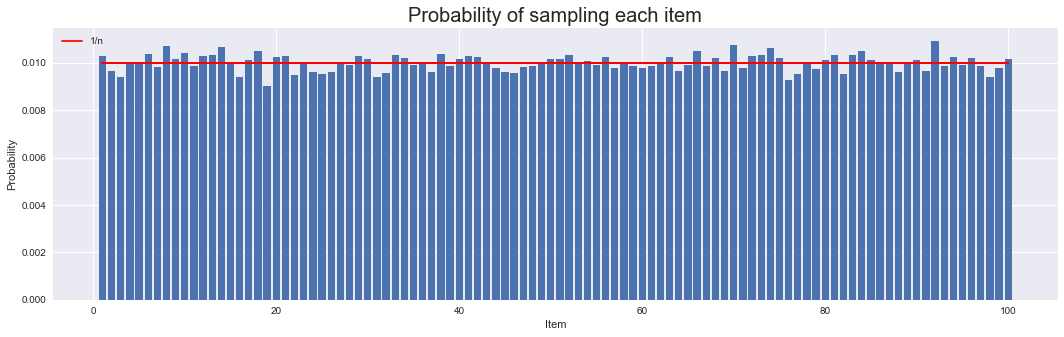

In [27]:
test()